<a href="https://colab.research.google.com/github/ameer-fice/Innovation-Camp---DA/blob/main/hotel_booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This database is taken from the following article:**
    
**Hotel Booking Demand Datasets, written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.**

**Imports**

In [1]:
import numpy as np 
import pandas as pd 

**1-Reading dataset**

In [2]:
df=pd.read_csv('hotel_booking.csv')
# https://www.kaggle.com/mojtaba142/hotel-booking
# 24 mb data

**2-Check basic database information.**

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.shape

(119390, 36)

**3-How many rows does this dataframe have?**

In [6]:
print("Our dataset have ", df.shape[0] ,' rows.')

Our dataset have  119390  rows.


**4-Do we have lost data? If yes, which column has the most missing data?**

In [7]:
count_null=df.isnull().sum()
for i in range(df.shape[0]-2):
    if(count_null[i]>0):
        print('yes, we have at least one missing data.')
        break

yes, we have at least one missing data.


In [8]:
max_null_val=df.isnull().sum().idxmax()
print('The maximum number of Null data is in column *** ',max_null_val,' ***')

The maximum number of Null data is in column ***  company  ***


**5-Remove the company column from the dataframe.**

In [9]:
df=df.drop(['company'], axis = 1)

In [10]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


**6-Which country do most travelers come from?**

**List the 5 countries with the most passengers.**

In [11]:
count_country=df.groupby(by='country')['name'].count()
count_country=count_country.sort_values(ascending=False)
df_count_country=pd.DataFrame(count_country)

print("The most travelers come from:\n ",count_country[:1])

print("\nList the 5 countries with the most passengers.\n",count_country[:5])

The most travelers come from:
  country
PRT    48590
Name: name, dtype: int64

List the 5 countries with the most passengers.
 country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
Name: name, dtype: int64


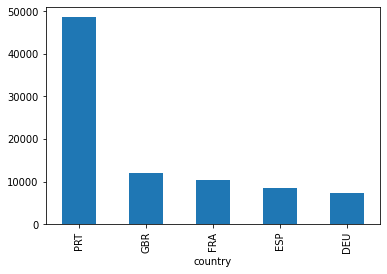

In [20]:
count_country[:5].plot(kind='bar')

**7-Who has the most ADR? How much?**

In [13]:
ADR=df.groupby(by='name')['adr'].max()
ADR=ADR.sort_values(ascending=False)
ADR_df = pd.DataFrame(ADR)
print('The most ADR(Average Daily Rate) is:\n',ADR_df.iloc[0])

The most ADR(Average Daily Rate) is:
 adr    5400.0
Name: Daniel Walter, dtype: float64


**8-Specify the mean of the total ADR?** (two decimal places)

In [14]:
num_adr=df['adr'].count()
Avg_adr=df['adr'].sum()/num_adr

print('Average of total Average Daily Rate is:', Avg_adr.round(decimals=2))


Average of total Average Daily Rate is: 101.83


**9-Specify the average number of nights spent.** (two decimal places)

In [15]:
df['all_night']= df.apply(lambda x: x['stays_in_weekend_nights'] + x['stays_in_week_nights'], axis=1)
m = df['all_night'].mean()
np.round(m,2)

3.43

**10-Specify the Name and Email of people who had 5 special requests.**

In [16]:
df_day=df.groupby(by='phone-number')['total_of_special_requests','name','email'].first()


for i in range(81503):
    if df_day.iloc[i][0] == 5:
        print(df_day.iloc[i],"\n\n")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


total_of_special_requests                    5
name                               Sarah Floyd
email                        Sarah_F@gmail.com
Name: 100-586-7149, dtype: object 


total_of_special_requests                            5
name                                     Laura Sanders
email                        Sanders_Laura@hotmail.com
Name: 120-754-3942, dtype: object 


total_of_special_requests                         5
name                                 Melinda Jensen
email                        MelindaJensen@zoho.com
Name: 129-892-8585, dtype: object 


total_of_special_requests                     5
name                             Angela Hawkins
email                        Angela_H@gmail.com
Name: 198-157-4544, dtype: object 


total_of_special_requests                              5
name                                     Cynthia Cabrera
email                        Cabrera.Cynthia@xfinity.com
Name: 280-973-9357, dtype: object 


total_of_special_requests             

**11-What are the most common last name?**

In [17]:
df['last_name'] = df['name'].apply(lambda x : x[x.index(' ') + 1:])
df['last_name'].value_counts()[:5]

Smith       2466
Johnson     1968
Williams    1590
Jones       1420
Brown       1403
Name: last_name, dtype: int64

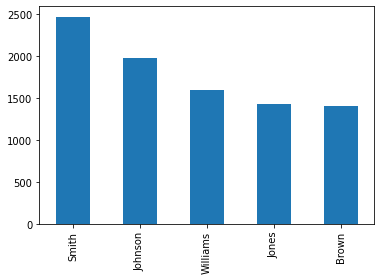

In [21]:
df['last_name'].value_counts()[:5].plot(kind='bar')

**12-Who has booked the hotel with the most children and babies?**

In [18]:
max_babies=df['babies'].idxmax()
max_children=df[ 'children'].idxmax()

print(df.iloc[max_children]["name"],
      " has booked a hotel with the largest number of children.")

print(df.iloc[max_babies]["name"],
      " has booked a hotel with the largest number of babies.")


Jamie Ramirez  has booked a hotel with the largest number of children.
Nicholas Parker  has booked a hotel with the largest number of babies.


**13-Specify the phone code of the areas that have the most hotel reservations.** (3 first codes)

In [19]:
phone_code=df['phone-number'].apply(lambda x : x[:3]).value_counts()[:3]

print("3 first codes that have the most hotel reservations :\n", phone_code)

3 first codes that have the most hotel reservations :
 799    168
185    167
541    166
Name: phone-number, dtype: int64


**Finished**